In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [9]:
data = pd.read_csv('local_farm_crop_yield_prediction.csv')
data.head()

,Temperature (°C),Rainfall (mm),Soil pH,Soil Moisture (%),Previous Yield (kg),Fertilizer Usage (kg/ha),Pesticide Usage (L/ha),Crop Yield (kg/ha)
0,22.490802,136.239883,5.603363,33.314407,3675.740252,67.534706,2.870976,7436.157527
1,34.014286,35.934284,6.562709,26.752127,4114.361356,190.974819,1.238790,5880.217103
2,29.639879,21.734231,6.581270,22.726660,3708.041937,144.156208,2.632919,7725.804643
3,26.973170,73.417914,6.774860,37.190632,3354.810135,100.235842,6.247374,7094.524561
4,18.120373,147.847568,6.952183,13.335924,3482.543484,70.890811,4.792821,7990.703497


Temperature (°C)            0
Rainfall (mm)               0
Soil pH                     0
Soil Moisture (%)           0
Previous Yield (kg)         0
Fertilizer Usage (kg/ha)    0
Pesticide Usage (L/ha)      0
Crop Yield (kg/ha)          0
dtype: int64


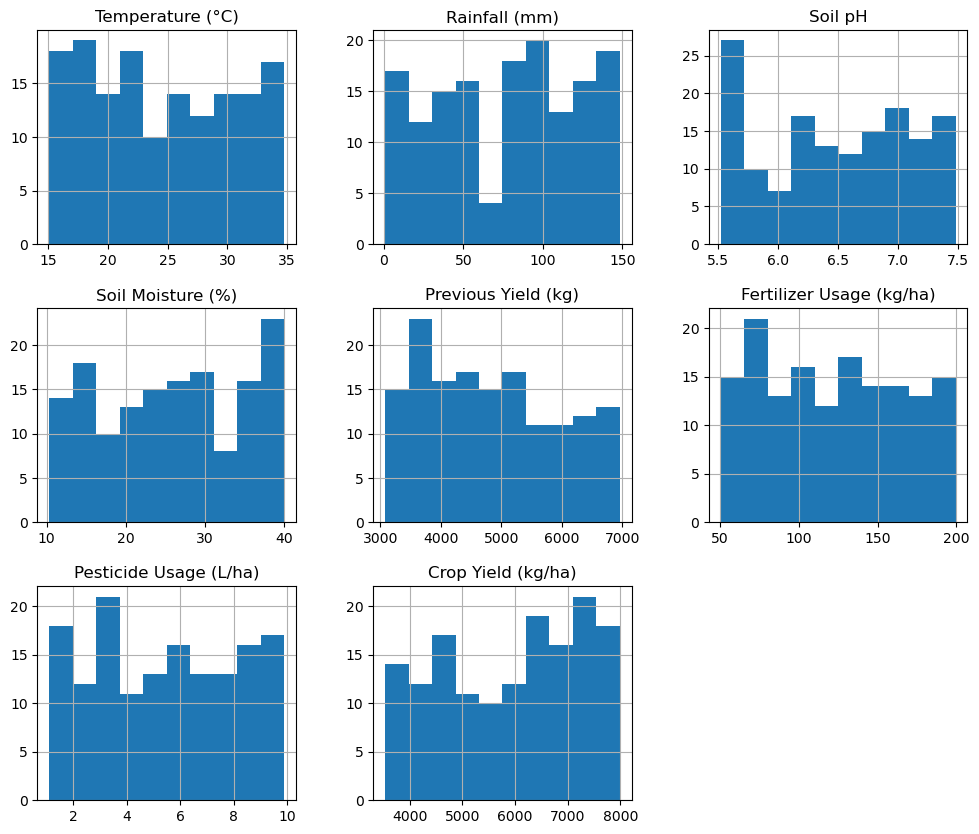

In [3]:
# Check for missing values
print(data.isnull().sum())

# Visualize distributions
data.hist(figsize=(12, 10))
plt.show()


In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X)


In [6]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb

# Load your dataset
data = pd.read_csv('local_farm_crop_yield_prediction.csv')  # Replace with your actual data file

# Define features and target
X = data[['Temperature (°C)', 'Rainfall (mm)', 'Soil pH', 'Soil Moisture (%)', 'Previous Yield (kg)', 'Fertilizer Usage (kg/ha)', 'Pesticide Usage (L/ha)']]
y = data['Crop Yield (kg/ha)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = xgb_mse ** 0.5
xgb_mape = (100 / len(y_test)) * sum(abs((y_test - xgb_pred) / y_test))

# Print results
print(f'XGBoost - MAE: {xgb_mae:.2f}, MSE: {xgb_mse:.2f}, RMSE: {xgb_rmse:.2f}, MAPE: {xgb_mape:.2f}%')


XGBoost - MAE: 1131.15, MSE: 1961237.11, RMSE: 1400.44, MAPE: 23.19%


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# Load your dataset
data = pd.read_csv('local_farm_crop_yield_prediction.csv')  # Replace with your actual data file

# Define features and target
X = data[['Temperature (°C)', 'Rainfall (mm)', 'Soil pH', 'Soil Moisture (%)', 'Previous Yield (kg)', 'Fertilizer Usage (kg/ha)', 'Pesticide Usage (L/ha)']]
y = data['Crop Yield (kg/ha)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Gradient Boosting regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
gb_pred = gb_model.predict(X_test)

# Calculate evaluation metrics
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = gb_mse ** 0.5
gb_mape = (100 / len(y_test)) * sum(abs((y_test - gb_pred) / y_test))

# Print results
print(f'Gradient Boosting - MAE: {gb_mae:.2f}, MSE: {gb_mse:.2f}, RMSE: {gb_rmse:.2f}, MAPE: {gb_mape:.2f}%')


Gradient Boosting - MAE: 1184.76, MSE: 2407698.16, RMSE: 1551.68, MAPE: 25.01%


In [31]:
# Calculate evaluation metrics for XGBoost
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)


In [32]:
# Calculate evaluation metrics for Gradient Boosting
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)


In [34]:
import numpy as np
# Define a threshold for classification (e.g., median yield)
threshold = np.median(y)

In [35]:
# Binarize the predictions
xgb_classes = (xgb_pred >= threshold).astype(int)
gb_classes = (gb_pred >= threshold).astype(int)
y_classes = (y_test >= threshold).astype(int)

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Confusion matrices
xgb_cm = confusion_matrix(y_classes, xgb_classes)
gb_cm = confusion_matrix(y_classes, gb_classes)

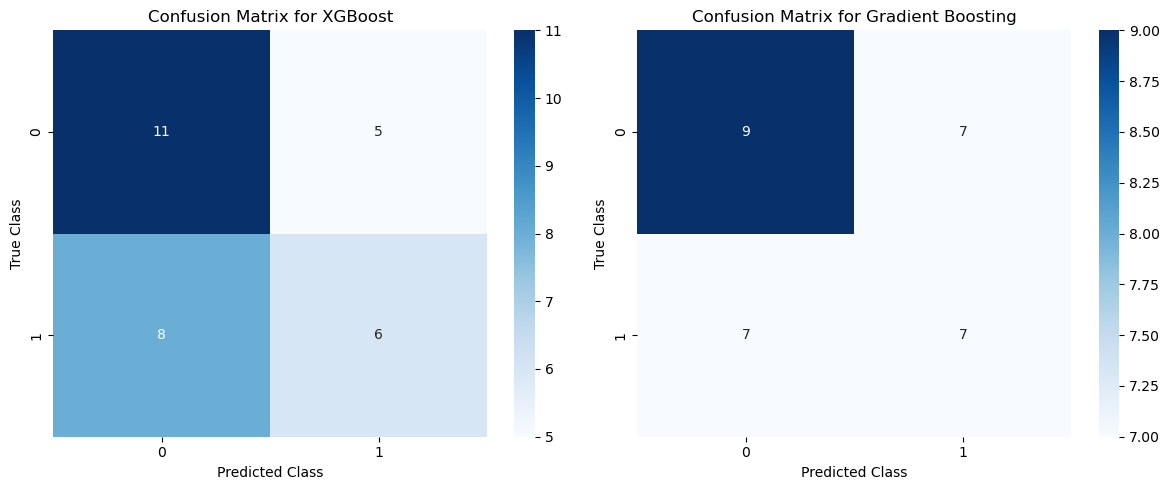

In [44]:
import seaborn as sns
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(xgb_cm, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix for XGBoost')
axes[0].set_xlabel('Predicted Class')
axes[0].set_ylabel('True Class')
# Gradient Boosting confusion matrix
sns.heatmap(gb_cm, annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Confusion Matrix for Gradient Boosting')
axes[1].set_xlabel('Predicted Class')
axes[1].set_ylabel('True Class')

plt.tight_layout()
plt.show()

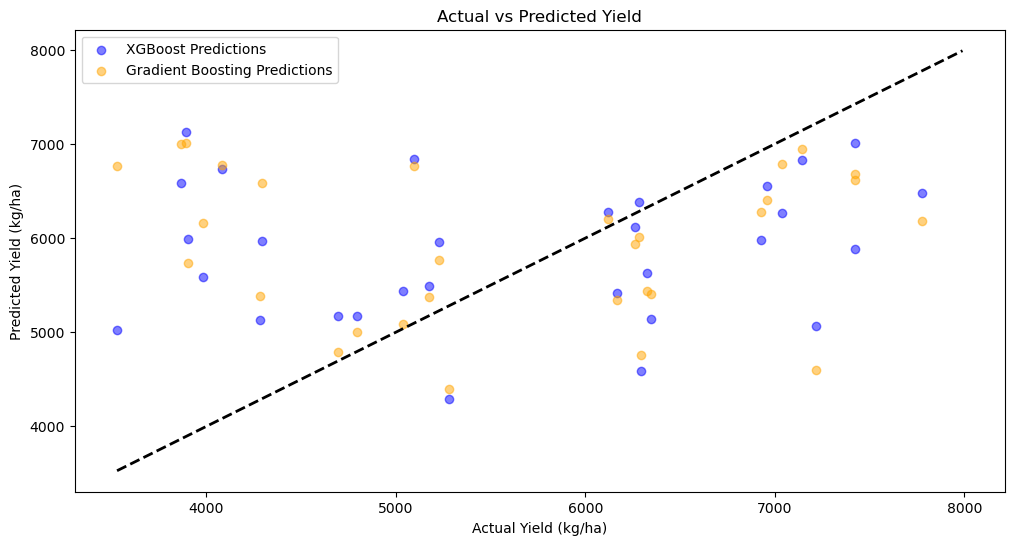

In [42]:
# Scatter plots for predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_test, xgb_pred, color='blue', label='XGBoost Predictions', alpha=0.5)
plt.scatter(y_test, gb_pred, color='orange', label='Gradient Boosting Predictions', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Line of perfect predictions
plt.xlabel('Actual Yield (kg/ha)')
plt.ylabel('Predicted Yield (kg/ha)')
plt.title('Actual vs Predicted Yield')
plt.legend()
plt.show()

In [48]:
# Save the models to disk
joblib.dump(xgb_model, 'xgb_model.joblib')
joblib.dump(gb_model, 'gb_model.joblib')

print("Models saved successfully.")


Models saved successfully.


In [12]:
import joblib
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Assuming your dataset is stored in X, y
# Example: X, y = your_dataset_features, your_dataset_labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Save the model
joblib.dump(xgb_model, 'xgb_model1.joblib')


['xgb_model1.joblib']